1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

### K-nearest neighbors (KNN) -
### Logistic regression - 
### Support vector machines - 
### Decision trees -
### Random forest -
### XGboost-

2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

### Dimensionality reduction
### Clustering

3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv",encoding = 'unicode_escape')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#Check missing values for each column
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

About 25% of customerIDs are missing so we drop them

In [6]:
#drop missing CustomerID
data.dropna(subset=['CustomerID'],inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# change the InvoiceDate format - Object to Timestamp format
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

# change the CustomerID format - float to int
data['CustomerID'] = data['CustomerID'].astype('int64')
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


The minimum quantity is negative so we only include positive quanitity

In [9]:
#Remove Quantity with negative values
data = data[data.Quantity > 0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
#Add the column - Total_Amount
data['TotalAmount'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [65]:
# Group by customerID
cust_group = data.groupby('CustomerID').agg({'TotalAmount':'sum',
                                             'InvoiceDate': 'max',
                                             'InvoiceNo':'count',
                                             'Country':min,
                                                })

cust_df=pd.DataFrame(cust_group)
cust_df["InvoiceDate"] = data['InvoiceDate'].max() - cust_df['InvoiceDate']
cust_df.head()

,TotalAmount,InvoiceDate,InvoiceNo,Country
CustomerID,,,,
12346,77183.60,325 days 02:49:00,1,United Kingdom
12347,4310.00,1 days 20:58:00,182,Iceland
12348,1797.24,74 days 23:37:00,31,Finland
12349,1757.55,18 days 02:59:00,73,Italy
12350,334.40,309 days 20:49:00,17,Norway


In [66]:
days_since_last_purchase = cust_df["InvoiceDate"] + pd.Timedelta("1 days")

In [67]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase], index = cust_df.index)
time_diff_in_days

CustomerID
12346    326
12347      2
12348     75
12349     19
12350    310
        ... 
18280    278
18281    181
18282      8
18283      4
18287     43
Length: 4339, dtype: int64

In [68]:
cust_df['InvoiceDate'] = time_diff_in_days
cust_df.head()

,TotalAmount,InvoiceDate,InvoiceNo,Country
CustomerID,,,,
12346,77183.60,326,1,United Kingdom
12347,4310.00,2,182,Iceland
12348,1797.24,75,31,Finland
12349,1757.55,19,73,Italy
12350,334.40,310,17,Norway


4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

I grouped the data by customer ID separately and aggregate the InvoiceDate, TotalAmount and InvoiceNo.

In [78]:
from sklearn.preprocessing import Normalizer

X = cust_df.drop('Country', axis=1).values
n = Normalizer()
norm_new = n.fit_transform(X)
norm_cust_df = pd.DataFrame(norm_new,columns=["TotalAmount","InvoiceDate","InvoiceNo"])
norm_cust_df

,TotalAmount,InvoiceDate,InvoiceNo
0,0.999991,0.004224,0.000013
1,0.999110,0.000464,0.042190
2,0.998982,0.041688,0.017231
3,0.999080,0.010801,0.041497
4,0.732846,0.679373,0.037256
...,...,...,...
4334,0.544529,0.838200,0.030151
4335,0.407466,0.912538,0.035292
4336,0.996735,0.044785,0.067177
4337,0.940622,0.001796,0.339451


In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [79]:
inertias = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(norm_new)    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with inertias')

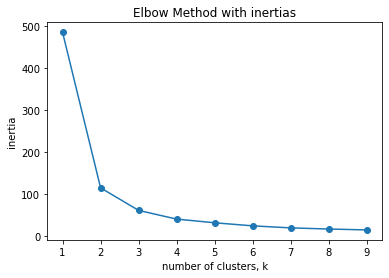

In [80]:
plt.plot(range(1,10),inertias,'-o')
plt.xlabel('number of clusters, k',)
plt.ylabel('inertia')
plt.title('Elbow Method with inertias')

In [81]:
model = KMeans(n_clusters=3)
model.fit(norm_new )
cluster = model.predict(norm_new )

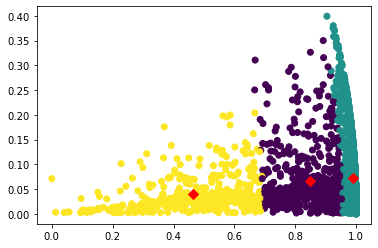

In [82]:
total_amount = norm_cust_df.iloc[:,0]

invoice_date = norm_cust_df.iloc[:,2]

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

plt.scatter(total_amount, invoice_date, c=cluster)
plt.scatter(centroids_x, centroids_y, marker='D', c='red', s=50)
plt.show()

5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

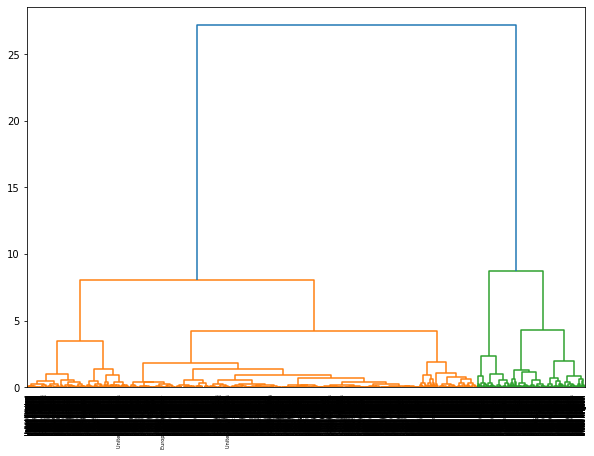

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(norm_cust_df,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels=list(cust_df['Country']))
plt.show()

6. Compare the results of 4 and 5. Which approach do you think is best? Why? 